In [1]:
import numpy as np

# a. Create a 4x5 array of even numbers starting from 10
matrix = np.arange(10, 10 + 4*5*2, 2).reshape(4, 5)

# b. Extract the third column (index 2)
third_column = matrix[:, 2]

# c. Set the fourth row (index 3) to [1, 2, 3, 4, 5]
matrix[3] = np.array([1, 2, 3, 4, 5])

# Output
print("Matrix:")
print(matrix)

print("\nThird Column:")
print(third_column)




Matrix:
[[10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]
 [ 1  2  3  4  5]]

Third Column:
[14 24 34  3]


In [ ]:
import numpy as np

# Given vectors
names = np.array(["Roxana", "Statira", "Roxana", "Statira", "Roxana"])
score = np.array([126, 115, 130, 141, 132])

# a. Extract all test scores that are smaller than 130
scores_below_130 = score[score < 130]

# b. Extract all test scores by Statira
scores_by_statira = score[names == "Statira"]

# c. Add 10 points to Roxana’s scores
roxana_scores_plus_10 = score[names == "Roxana"] + 10

# Outputs
print("a. Scores smaller than 130:", scores_below_130)
print("b. Scores by Statira:", scores_by_statira)
print("c. Roxana's scores after adding 10:", roxana_scores_plus_10)


Data Frame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/jay-D-Deshmukh/ML-Linear-Regression/main/CarPrice_project.csv"
df = pd.read_csv(url)

# Quick check
print(df.head(2))


   car_ID  symboling              CarName fueltype aspiration doornumber  \
0       1          3   alfa-romero giulia      gas        std        two   
1       2          3  alfa-romero stelvio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  

[2 rows x 26 columns]


In [3]:
sliced_df = df[(df['carlength'] > 180) & (df['fueltype'] == 'diesel')]
print("5. First 5 sliced rows:\n", sliced_df.head())


5. First 5 sliced rows:
      car_ID  symboling                   CarName fueltype aspiration  \
67       68         -1  buick electra 225 custom   diesel      turbo   
68       69         -1  buick century luxus (sw)   diesel      turbo   
69       70          0             buick century   diesel      turbo   
70       71         -1             buick skyhawk   diesel      turbo   
108     109          0               peugeot 304   diesel      turbo   

    doornumber  carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
67        four    sedan        rwd          front      110.0  ...         183   
68        four    wagon        rwd          front      110.0  ...         183   
69         two  hardtop        rwd          front      106.7  ...         183   
70        four    sedan        rwd          front      115.6  ...         183   
108       four    sedan        rwd          front      107.9  ...         152   

     fuelsystem  boreratio  stroke compressionratio hor

In [5]:
fueltype_count = df['fueltype'].value_counts()
print("6. Number of cars per fueltype:\n", fueltype_count)

6. Number of cars per fueltype:
 fueltype
gas       185
diesel     20
Name: count, dtype: int64


In [6]:
def classify_car(length):
    if length < 150:
        return 'short_length_cars'
    elif 150 <= length <= 170:
        return 'mid_length_cars'
    else:
        return 'long_length_cars'

df['car_type'] = df['carlength'].apply(classify_car)
print("7. DataFrame with car_type column:\n", df[['carlength', 'car_type']].head())


7. DataFrame with car_type column:
    carlength          car_type
0      168.8   mid_length_cars
1      168.8   mid_length_cars
2      171.2  long_length_cars
3      176.6  long_length_cars
4      176.6  long_length_cars


In [7]:
# Series
capital_series = pd.Series({
    'India': 'New Delhi',
    'Japan': 'Tokyo',
    'France': 'Paris',
    'Australia': 'Canberra'
})
print("8. Capital Series:\n", capital_series)

# DataFrame
country_data = pd.DataFrame({
    'Population': [1_400_000_000, 126_000_000, 67_000_000, 25_000_000],
    'Capital': ['New Delhi', 'Tokyo', 'Paris', 'Canberra']
}, index=['India', 'Japan', 'France', 'Australia'])

print("\nCountry DataFrame:\n", country_data)


8. Capital Series:
 India        New Delhi
Japan            Tokyo
France           Paris
Australia     Canberra
dtype: object

Country DataFrame:
            Population    Capital
India      1400000000  New Delhi
Japan       126000000      Tokyo
France       67000000      Paris
Australia    25000000   Canberra


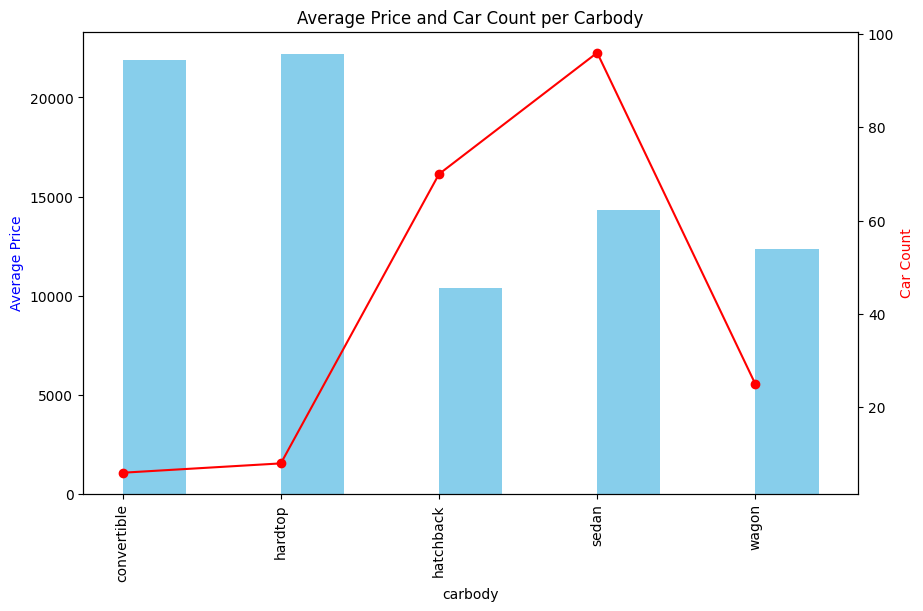

In [8]:
# Group data
carbody_price_avg = df.groupby('carbody')['price'].mean()
carbody_count = df['carbody'].value_counts()

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot
carbody_price_avg.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4)
ax1.set_ylabel('Average Price', color='blue')

# Line plot
ax2 = ax1.twinx()
carbody_count[carbody_price_avg.index].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Car Count', color='red')

plt.title('Average Price and Car Count per Carbody')
plt.show()


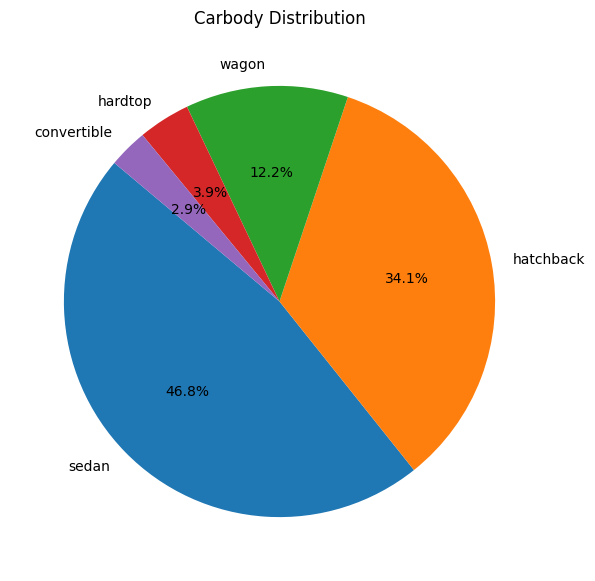

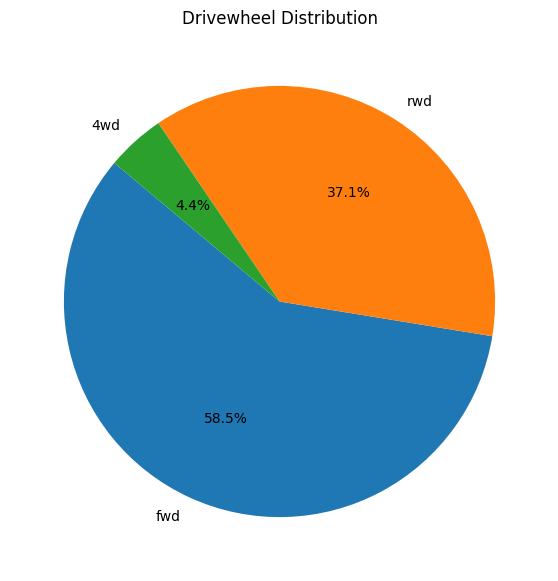

10a. Carbody type that dominates: sedan
10b. Drivewheel type that is least common: 4wd


In [9]:
# a. Carbody proportion
carbody_counts = df['carbody'].value_counts()
plt.figure(figsize=(7,7))
carbody_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Carbody Distribution')
plt.ylabel('')
plt.show()

# b. Drivewheel proportion
drivewheel_counts = df['drivewheel'].value_counts()
plt.figure(figsize=(7,7))
drivewheel_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Drivewheel Distribution')
plt.ylabel('')
plt.show()

# Observations
print("10a. Carbody type that dominates:", carbody_counts.idxmax())
print("10b. Drivewheel type that is least common:", drivewheel_counts.idxmin())


Plots

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew

# Load the dataset
url = "https://docs.google.com/spreadsheets/d/1r3lX9tDyMM0oyM6VBLy2uguYI0iJyIETUB4Nt1jExGc/export?format=csv"
df = pd.read_csv(url)

# Preview the data
print(df.head())


  minority  age  gender credits    beauty  eval division native tenure  \
0      yes   36  female    more  0.289916   4.3    upper    yes    yes   
1      yes   36  female    more  0.289916   3.7    upper    yes    yes   
2      yes   36  female    more  0.289916   3.6    upper    yes    yes   
3      yes   36  female    more  0.289916   4.4    upper    yes    yes   
4       no   59    male    more -0.737732   4.5    upper    yes    yes   

   students  allstudents  prof  PrimaryLast  vismin  female  single_credit  \
0        24           43     1            0       1       1              0   
1        86          125     1            0       1       1              0   
2        76          125     1            0       1       1              0   
3        77          123     1            1       1       1              0   
4        17           20     2            0       0       0              0   

   upper_division  English_speaker  tenured_prof  
0               1                1 

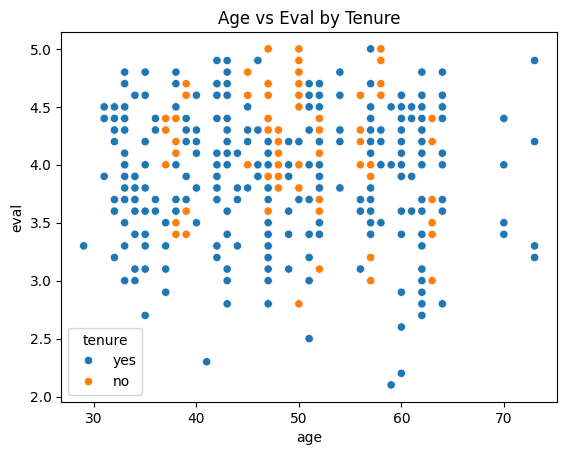

In [11]:
sns.scatterplot(x='age', y='eval', hue='tenure', data=df)
plt.title('Age vs Eval by Tenure')
plt.show()

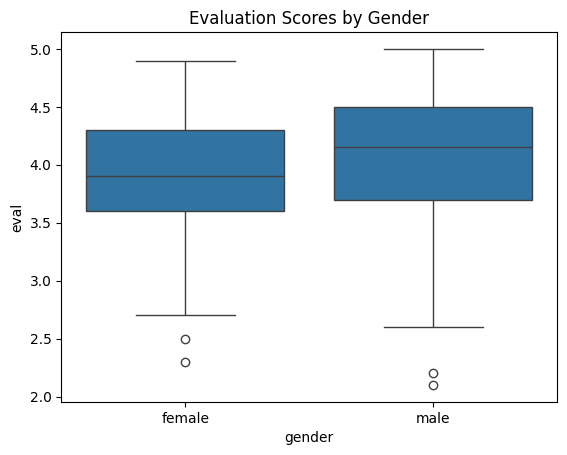

In [12]:
sns.boxplot(x='gender', y='eval', data=df)
plt.title('Evaluation Scores by Gender')
plt.show()


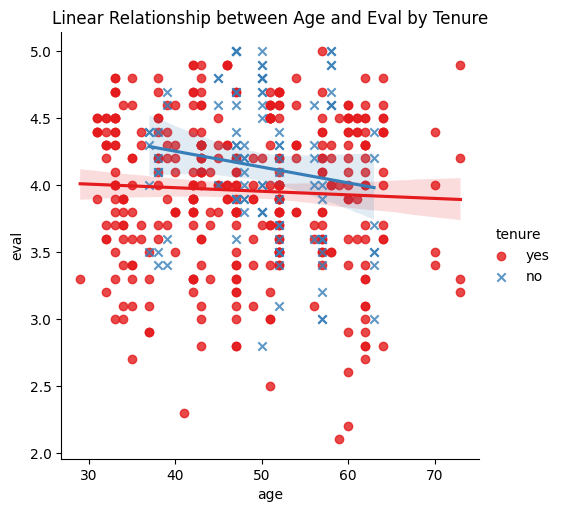

In [13]:
sns.lmplot(x='age', y='eval', hue='tenure', data=df, markers=["o", "x"], palette="Set1")
plt.title('Linear Relationship between Age and Eval by Tenure')
plt.show()


In [14]:
mean_eval = df['eval'].mean()
std_eval = df['eval'].std()
z_score = (4.5 - mean_eval) / std_eval

# Cumulative probability
cumulative_prob = norm.cdf(z_score)

# Complementary probability (P(eval > 4.5))
probability_greater_4_5 = 1 - cumulative_prob

print(f"Probability of eval > 4.5: {probability_greater_4_5:.4f}")


Probability of eval > 4.5: 0.1829


In [15]:
z_score_2 = (2 - mean_eval) / std_eval
z_score_3 = (3 - mean_eval) / std_eval

prob_2 = norm.cdf(z_score_2)
prob_3 = norm.cdf(z_score_3)

probability_between_2_3 = prob_3 - prob_2

print(f"Probability of eval between 2 and 3: {probability_between_2_3:.4f}")


Probability of eval between 2 and 3: 0.0358


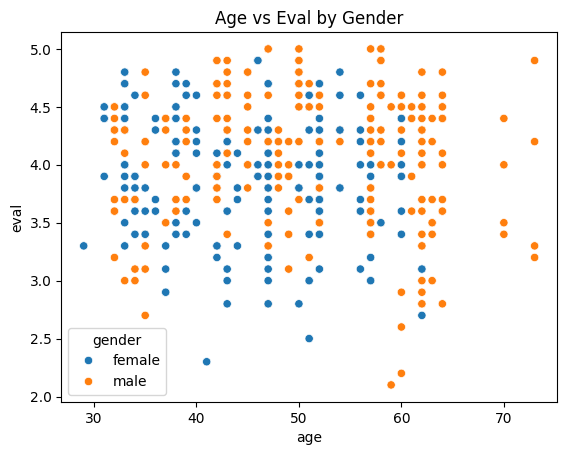

In [16]:
sns.scatterplot(x='age', y='eval', hue='gender', data=df)
plt.title('Age vs Eval by Gender')
plt.show()


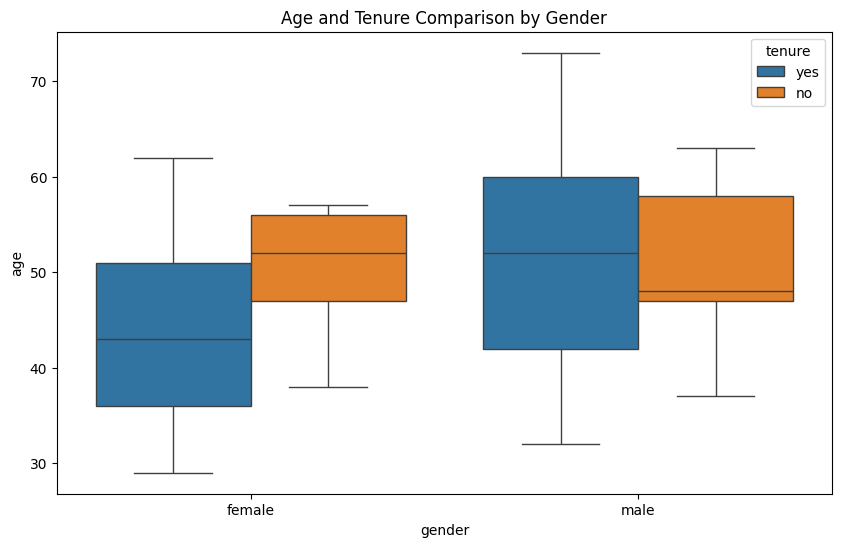

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='tenure', data=df)
plt.title('Age and Tenure Comparison by Gender')
plt.show()


Skewness of evaluation scores: -0.4659


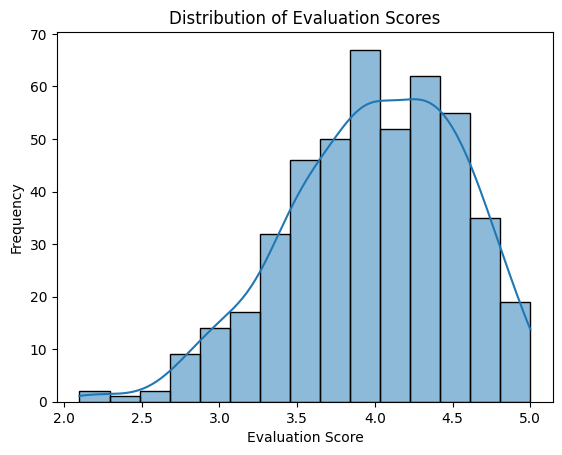

The distribution is negatively skewed (left-tailed).


In [18]:
eval_skewness = skew(df['eval'])

print(f"Skewness of evaluation scores: {eval_skewness:.4f}")

# Plot histogram
sns.histplot(df['eval'], kde=True)
plt.title('Distribution of Evaluation Scores')
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')
plt.show()

# Interpretation
if eval_skewness > 0:
    print("The distribution is positively skewed (right-tailed).")
elif eval_skewness < 0:
    print("The distribution is negatively skewed (left-tailed).")
else:
    print("The distribution is symmetric.")


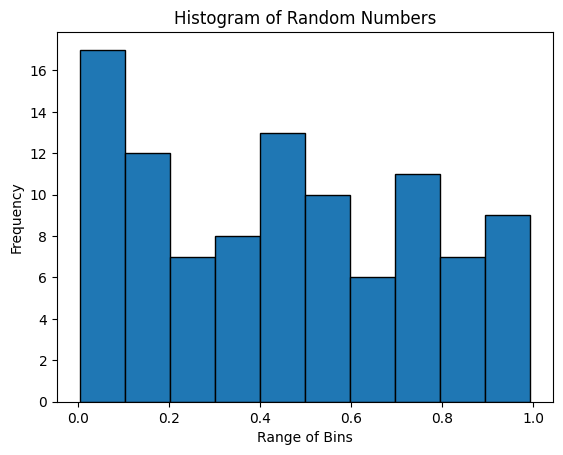

Range 0.00 - 0.10: Frequency = 17
Range 0.10 - 0.20: Frequency = 12
Range 0.20 - 0.30: Frequency = 7
Range 0.30 - 0.40: Frequency = 8
Range 0.40 - 0.50: Frequency = 13
Range 0.50 - 0.60: Frequency = 10
Range 0.60 - 0.70: Frequency = 6
Range 0.70 - 0.80: Frequency = 11
Range 0.80 - 0.90: Frequency = 7
Range 0.90 - 0.99: Frequency = 9


In [19]:
# Generate random numbers
random_numbers = np.random.rand(100)

# Create histogram with equal bins
plt.hist(random_numbers, bins=10, edgecolor='black')
plt.title('Histogram of Random Numbers')
plt.xlabel('Range of Bins')
plt.ylabel('Frequency')
plt.show()

# Frequencies
counts, bin_edges = np.histogram(random_numbers, bins=10)

for i in range(len(counts)):
    print(f"Range {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}: Frequency = {counts[i]}")


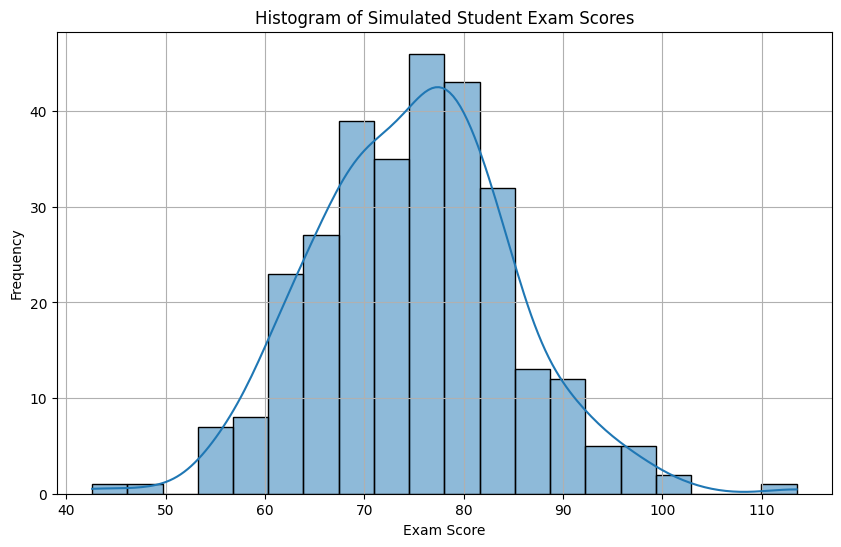

Number of outliers detected: 2
Outlier exam scores: [113.52731491  42.5873266 ]


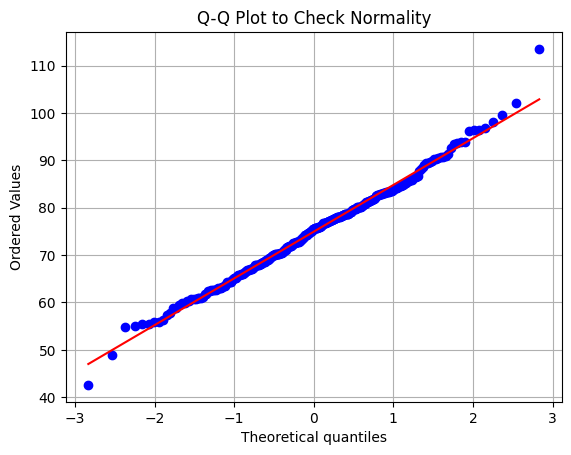

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, zscore

# Set parameters
mean_score = 75
std_dev = 10
n_students = 300

# Generate 300 normally distributed exam scores
np.random.seed(42)  # For reproducibility
exam_scores = np.random.normal(loc=mean_score, scale=std_dev, size=n_students)

# (a) Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(exam_scores, bins=20, kde=True, edgecolor='black')
plt.title('Histogram of Simulated Student Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# (b) Check Normality and Identify Outliers

# Quick Normality Check (visual from KDE curve)
# Calculate z-scores
z_scores = zscore(exam_scores)

# Outliers are usually z-scores > 3 or < -3
outliers = exam_scores[(z_scores > 3) | (z_scores < -3)]

print(f"Number of outliers detected: {len(outliers)}")
print("Outlier exam scores:", outliers)

# Optional: Q-Q Plot for more formal normality check
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(exam_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot to Check Normality')
plt.grid(True)
plt.show()
